# Introduction

Text box for introduction

In [30]:
#Code box for introduction

# Method

Text box for method

In [ ]:
#Code box for method

# Analysis code
View in-cell comments for explanations.

In [26]:
#Reading appropriate libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)

#Reading players.csv into Jupyter
players_url<- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players_data<- read_csv(players_url)

players_data <- players_data |>
  select(-individualId, -organizationName, -hashedEmail, -name)

#Viewing the data
head(players_data)


Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,played_hours,gender,age
<chr>,<lgl>,<dbl>,<chr>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Veteran,FALSE,0.0,Male,17
Amateur,TRUE,0.7,Female,21
Regular,TRUE,0.1,Male,21
Amateur,TRUE,0.0,Female,17


In [27]:

#Splitting the data 50/50--because the dataset is relatively small, we want to reserve a decent amount of data to be tested upon
set.seed(2019)
players_split <- initial_split(players_data, prop=0.5, strata= played_hours)  
players_training <- training(players_split)
players_testing <- testing(players_split)

#Creating a linear regression model
lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

#Creating a linear regression recipe
lm_recipe <- recipe(played_hours ~ experience + subscribe + gender + age, data = 
players_training)

#Creating a linear regression workflow
lm_fit <- workflow() |>
       add_recipe(lm_recipe) |>
       add_model(lm_spec) |>
       fit(data = players_training)

#Rendering results from the workflow
lm_test_results <- lm_fit |>
         predict(players_testing) |>
         bind_cols(players_testing) |>
         metrics(truth = played_hours , estimate = .pred)

#Determining our RMSPE
lm_rmspe <- lm_test_results |>
          filter(.metric == "rmse") |>
          select(.estimate) |>
          pull()
lm_rmspe

[1] 28.47395

**Above is our listed RMSPE.**

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


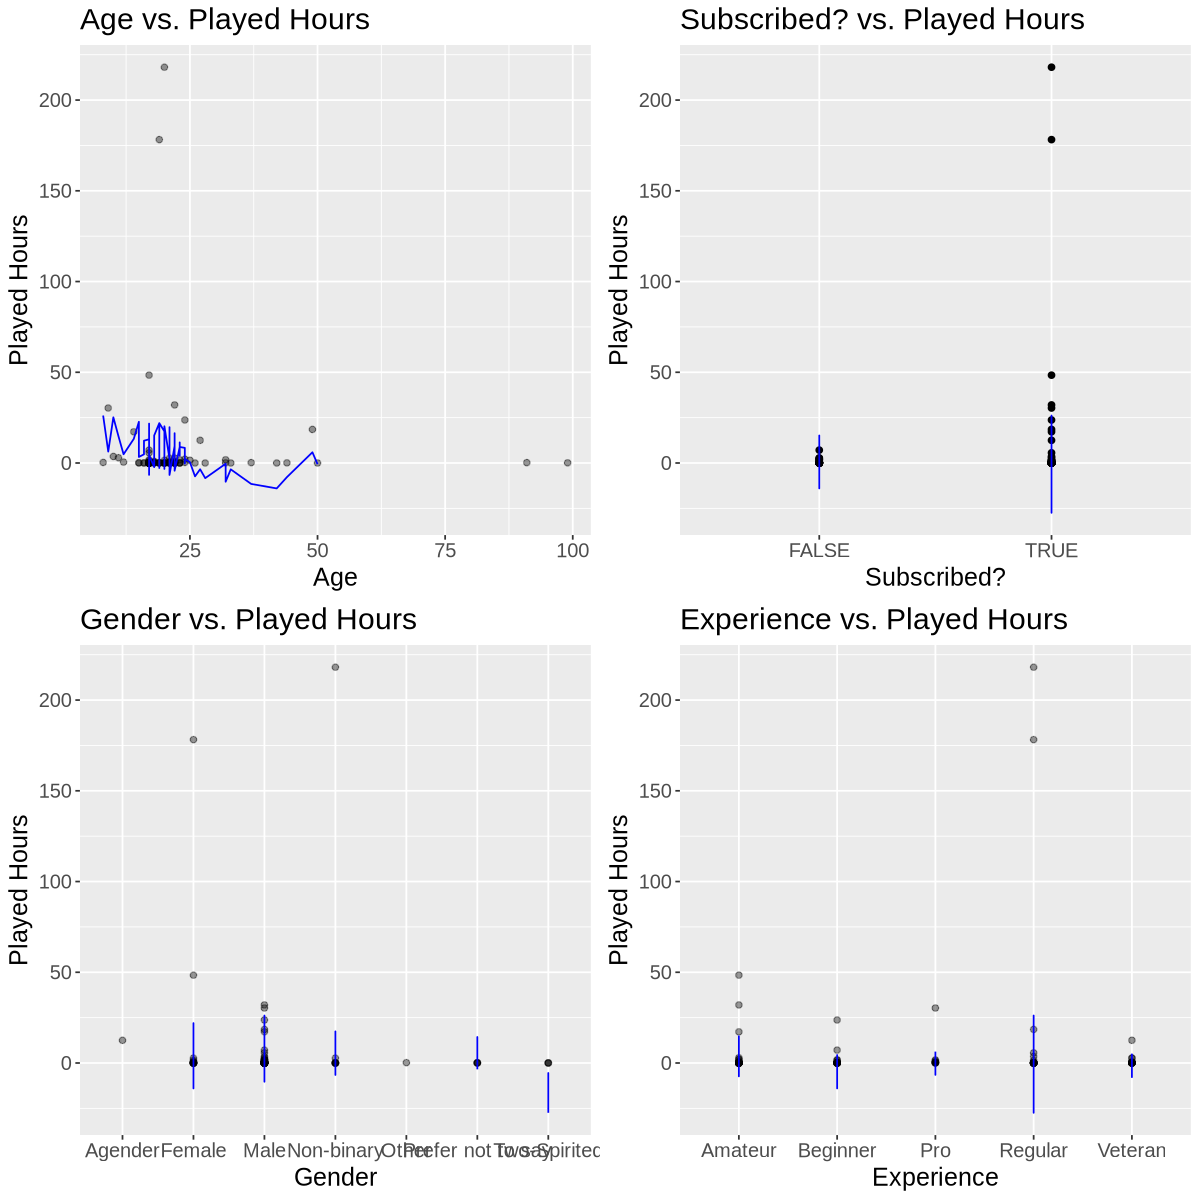

In [28]:
#Making predictions with our workflow
test_preds <- lm_fit |>
   predict(players_testing) |>
   bind_cols(players_testing)

#Plotting age-playtime predictions
age_plot <- test_preds |>
     ggplot(aes(x = age, y = played_hours)) +
         geom_point(alpha = 0.4) +
         geom_line(
             mapping = aes(x = age, y = .pred), 
             color = "blue") +
         xlab("Age") +
         ylab("Played Hours") +
        ggtitle("Age vs. Played Hours") +
         theme(text = element_text(size = 15))

#Plotting subscription-playtime predictions
subscribe_plot <- test_preds |>
     ggplot(aes(x = subscribe, y = played_hours)) +
         geom_point() +
         geom_line(
             mapping = aes(x = subscribe, y = .pred), 
             color = "blue") +
         xlab("Subscribed?") +
         ylab("Played Hours") +
        ggtitle("Subscribed? vs. Played Hours") + 
         theme(text = element_text(size = 15))

#Plotting gender-playtime predictions
gender_plot <- test_preds |>
     ggplot(aes(x = gender, y = played_hours)) +
         geom_point(alpha = 0.4) +
         geom_line(
             mapping = aes(x = gender, y = .pred), 
             color = "blue") +
         xlab("Gender") +
         ylab("Played Hours") +
        ggtitle("Gender vs. Played Hours") +
         theme(text = element_text(size = 15))

#Plotting experience-playtime predictions
experience_plot <- test_preds |>
     ggplot(aes(x = experience, y = played_hours)) +
         geom_point(alpha = 0.4) +
         geom_line(
             mapping = aes(x = experience, y = .pred), 
             color = "blue") +
         xlab("Experience") +
         ylab("Played Hours") +
        ggtitle("Experience vs. Played Hours") +
         theme(text = element_text(size = 15))

options(repr.plot.width = 10, repr.plot.height = 10)
library(gridExtra)
grid.arrange(age_plot, subscribe_plot, gender_plot, experience_plot, ncol=2, nrow =2)

# Discussion
**Summary of findings**

Our multiple linear regression analysis seemingly reveals that younger players tend to contribute more hours of playtime to the server than players above the age of 25, that players who are subscribed to PLAIcraft updates tend to contribute more hours of playtime than players who aren't, that male and female players tend to contribute more hours of playtime than non-binary, Two-Spirit, or undisclosed-gender players, and that players with a "regular" level of experience tend to contribute more hours of playtime than those at other levels. However, these results come from a prediction model with an RMSPE of about 28, meaning the average difference between predicted hours by a given variable and actual hours by a given variable averages at about 28 across all observations--this could be because the size of the dataset makes it hard to scale and standardize properly. This very high RMSPE makes the results of the model generally unreliable. If we assume, however, that the model is reliable, it communicates that an archetypal player profile researchers should target for their data is that of a <25 year old male or female who is subscribe to PLAIcraft updates and describes themself as a "regular" Minecraft player.

**Is this what we expected to find?**

We expected to see a distinct relationship between age and played hours (as well as subscription and experience to an extent) because we predicted that it might be directly related to interest in Minecraft as well as available time for playing Minecraft and exposure to PLAIcraft research (more likely to be university students). However, we did not distinctly or accurately predict the severity of these relationships.

**Impact of findings?**

Paste from gdoc

**Future questions this could lead to**

Paste from gdoc